In [1]:
!pip install translate

In [2]:
import pandas as pd
data=pd.read_csv('Combined_Brands_Dataset.csv')
data.head()

,created_at,username,normalized_text,Topic Label,Category,Language,Brands
0,Fri Sep 29 21:25:46 +0000 2023,alpha1906,nike trash adidas go favoriteexceptfor nike wr...,Comfortability,Clothing,en,Adidas
1,Fri Sep 29 17:05:47 +0000 2023,ElkCitySptswear,team new new look season take advantage adidas...,Comfortability,Other,en,Adidas
2,Fri Sep 29 14:18:11 +0000 2023,BeardedMangus,favorite breakfast shoes adidas derrick rose m...,Comfortability,Footwear,en,Adidas
3,Fri Sep 29 07:33:35 +0000 2023,TheJoelParadox,deal ladies youre suns fan adidas nmd r impact...,Comfortability,Footwear,en,Adidas
4,Fri Sep 29 04:15:11 +0000 2023,KicksDeals,select sizes available creamcarbongrey adidas ...,Size Availability,Clothing,en,Adidas


In [9]:
#from translate import Translator

#def convert_eng(tweet):
   # translator=Translator(to_lang="en", from_lang="id")
    #translation=translator.translate(tweet)
    #return translation

#data['tweet_english']=data['normalized_text'].apply(convert_eng)

ConnectionError: HTTPConnectionPool(host='api.mymemory.translated.net', port=80): Max retries exceeded with url: /get?q=nike+trash+adidas+go+favoriteexceptfor+nike+wrestling+joints+copped+pandemic+damn+things+comfortable+hell&langpair=id%7Cen (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x00000228140C1BE0>: Failed to resolve 'api.mymemory.translated.net' ([Errno 11001] getaddrinfo failed)"))

In [4]:
#DATA PREPROCESSING
#data= pd.DataFrame(data[['normalized_text']])
#data.head(5)

,normalized_text
0,nike trash adidas go favoriteexceptfor nike wr...
1,team new new look season take advantage adidas...
2,favorite breakfast shoes adidas derrick rose m...
3,deal ladies youre suns fan adidas nmd r impact...
4,select sizes available creamcarbongrey adidas ...


In [3]:
#data.to_csv('Combined_Brands_Dataset_nb.csv')
#data=pd.read_csv('Combined_Brands_Dataset_nb.csv')
data= pd.DataFrame(data[['created_at','username','normalized_text','Topic Label','Category','Language','Brands']])
data.head()

,created_at,username,normalized_text,Topic Label,Category,Language,Brands
0,Fri Sep 29 21:25:46 +0000 2023,alpha1906,nike trash adidas go favoriteexceptfor nike wr...,Comfortability,Clothing,en,Adidas
1,Fri Sep 29 17:05:47 +0000 2023,ElkCitySptswear,team new new look season take advantage adidas...,Comfortability,Other,en,Adidas
2,Fri Sep 29 14:18:11 +0000 2023,BeardedMangus,favorite breakfast shoes adidas derrick rose m...,Comfortability,Footwear,en,Adidas
3,Fri Sep 29 07:33:35 +0000 2023,TheJoelParadox,deal ladies youre suns fan adidas nmd r impact...,Comfortability,Footwear,en,Adidas
4,Fri Sep 29 04:15:11 +0000 2023,KicksDeals,select sizes available creamcarbongrey adidas ...,Size Availability,Clothing,en,Adidas


In [14]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

# CLASSIFICATION USING TEXT BLOB

In [4]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [13]:
status = []
total_positive = total_negative = total_neutral = total = 0

for tweet in data['normalized_text']:
    analysis = TextBlob(tweet)
    total += 1

    if analysis.sentiment.polarity > 0.0:
        total_positive += 1
        status.append('Positive')
    elif analysis.sentiment.polarity == 0.0:
        total_neutral += 1
        status.append('Neutral')
    else:
        total_negative += 1
        status.append('Negative')

print(f'Data Analysis:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data: {total}')

data['Classification'] = status
data = pd.DataFrame(data[['created_at', 'username', 'normalized_text', 'Topic Label', 'Category', 'Language', 'Brands', 'Classification']])
data.head()

Data Analysis:
Positive=33826
Neutral=15891
Negative=9637

Total Data: 59354


,created_at,username,normalized_text,Topic Label,Category,Language,Brands,Classification
0,Fri Sep 29 21:25:46 +0000 2023,alpha1906,nike trash adidas go favoriteexceptfor nike wr...,Comfortability,Clothing,en,Adidas,Positive
1,Fri Sep 29 17:05:47 +0000 2023,ElkCitySptswear,team new new look season take advantage adidas...,Comfortability,Other,en,Adidas,Positive
2,Fri Sep 29 14:18:11 +0000 2023,BeardedMangus,favorite breakfast shoes adidas derrick rose m...,Comfortability,Footwear,en,Adidas,Positive
3,Fri Sep 29 07:33:35 +0000 2023,TheJoelParadox,deal ladies youre suns fan adidas nmd r impact...,Comfortability,Footwear,en,Adidas,Positive
4,Fri Sep 29 04:15:11 +0000 2023,KicksDeals,select sizes available creamcarbongrey adidas ...,Size Availability,Clothing,en,Adidas,Positive


In [14]:
data['Classification']=status
data

,created_at,username,normalized_text,Topic Label,Category,Language,Brands,Classification
0,Fri Sep 29 21:25:46 +0000 2023,alpha1906,nike trash adidas go favoriteexceptfor nike wr...,Comfortability,Clothing,en,Adidas,Positive
1,Fri Sep 29 17:05:47 +0000 2023,ElkCitySptswear,team new new look season take advantage adidas...,Comfortability,Other,en,Adidas,Positive
2,Fri Sep 29 14:18:11 +0000 2023,BeardedMangus,favorite breakfast shoes adidas derrick rose m...,Comfortability,Footwear,en,Adidas,Positive
3,Fri Sep 29 07:33:35 +0000 2023,TheJoelParadox,deal ladies youre suns fan adidas nmd r impact...,Comfortability,Footwear,en,Adidas,Positive
4,Fri Sep 29 04:15:11 +0000 2023,KicksDeals,select sizes available creamcarbongrey adidas ...,Size Availability,Clothing,en,Adidas,Positive
...,...,...,...,...,...,...,...,...
59349,Sun Nov 19 01:08:11 +0000 2023,farizah_ismail,pki kasut puma duhhh,Price,Footwear,id,Puma,Negative
59350,Sun Nov 19 00:37:20 +0000 2023,PokeGangX,pokegang pokegang shoe shoesaddict shoesfashio...,Price,Footwear,id,Puma,Neutral
59351,Sat Nov 18 07:55:15 +0000 2023,PokeGangX,pokegang pokegang shoe shoesaddict shoesfashio...,Price,Footwear,id,Puma,Neutral
59352,Sat Nov 18 01:22:57 +0000 2023,racunsanasini,cantik pulak kasut baru puma ni design nice se...,Price,Footwear,id,Puma,Positive


In [16]:
data= pd.DataFrame(data[['created_at','username','normalized_text','Topic Label','Category','Language','Brands','Classification']])
data.head()

,created_at,username,normalized_text,Topic Label,Category,Language,Brands,Classification
0,Fri Sep 29 21:25:46 +0000 2023,alpha1906,nike trash adidas go favoriteexceptfor nike wr...,Comfortability,Clothing,en,Adidas,Positive
1,Fri Sep 29 17:05:47 +0000 2023,ElkCitySptswear,team new new look season take advantage adidas...,Comfortability,Other,en,Adidas,Positive
2,Fri Sep 29 14:18:11 +0000 2023,BeardedMangus,favorite breakfast shoes adidas derrick rose m...,Comfortability,Footwear,en,Adidas,Positive
3,Fri Sep 29 07:33:35 +0000 2023,TheJoelParadox,deal ladies youre suns fan adidas nmd r impact...,Comfortability,Footwear,en,Adidas,Positive
4,Fri Sep 29 04:15:11 +0000 2023,KicksDeals,select sizes available creamcarbongrey adidas ...,Size Availability,Clothing,en,Adidas,Positive


In [17]:
data.to_csv('Combined_Brands_Dataset_TB.csv')
data=pd.read_csv('Combined_Brands_Dataset_TB.csv')
data.head()

,Unnamed: 0,created_at,username,normalized_text,Topic Label,Category,Language,Brands,Classification
0,0,Fri Sep 29 21:25:46 +0000 2023,alpha1906,nike trash adidas go favoriteexceptfor nike wr...,Comfortability,Clothing,en,Adidas,Positive
1,1,Fri Sep 29 17:05:47 +0000 2023,ElkCitySptswear,team new new look season take advantage adidas...,Comfortability,Other,en,Adidas,Positive
2,2,Fri Sep 29 14:18:11 +0000 2023,BeardedMangus,favorite breakfast shoes adidas derrick rose m...,Comfortability,Footwear,en,Adidas,Positive
3,3,Fri Sep 29 07:33:35 +0000 2023,TheJoelParadox,deal ladies youre suns fan adidas nmd r impact...,Comfortability,Footwear,en,Adidas,Positive
4,4,Fri Sep 29 04:15:11 +0000 2023,KicksDeals,select sizes available creamcarbongrey adidas ...,Size Availability,Clothing,en,Adidas,Positive


# VISUALIZATION

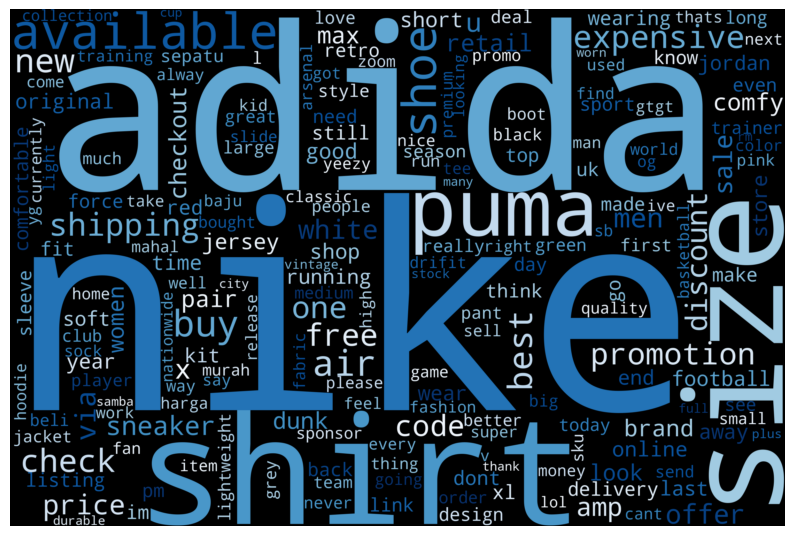

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordclud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words=' '.join([tweets for tweets in data['normalized_text']])

wordcloud=WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)
plot_cloud(wordcloud)

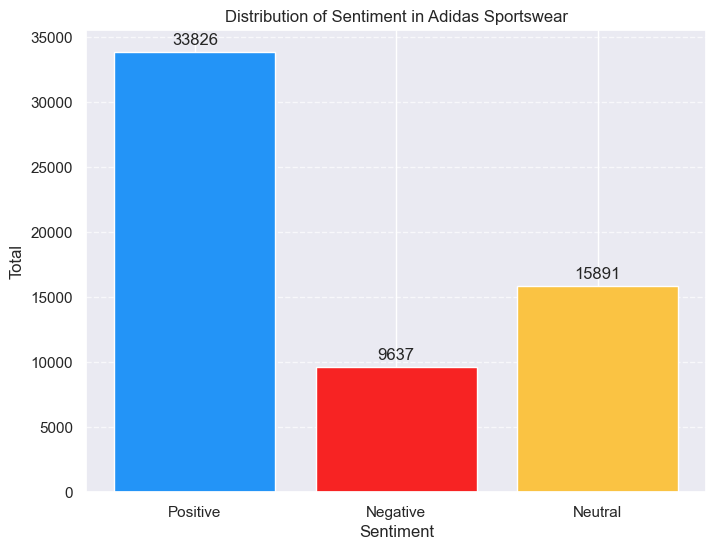

In [7]:
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

# CLASSIFICATION USING NAIVE BAYES

In [11]:
data

,normalized_text,Classification
0,nike trash adidas go favoriteexceptfor nike wr...,Positive
1,team new new look season take advantage adidas...,Positive
2,favorite breakfast shoes adidas derrick rose m...,Positive
3,deal ladies youre suns fan adidas nmd r impact...,Positive
4,select sizes available creamcarbongrey adidas ...,Positive
...,...,...
59349,pki kasut puma duhhh,Negative
59350,pokegang pokegang shoe shoesaddict shoesfashio...,Neutral
59351,pokegang pokegang shoe shoesaddict shoesfashio...,Neutral
59352,cantik pulak kasut baru puma ni design nice se...,Positive


In [12]:
#dataset=data.drop([''],axis=1, inplace=False)
dataset=[tuple(x) for x in data.to_records(index=False)]

In [13]:
import random

set_positive=[]
set_negative=[]
set_neutral=[]

for n in dataset:
    if(n[1]=='Positive'):
        set_positive.append(n)
    elif(n[1]=='Negative'):
        set_negative.append(n)
    else:
        set_neutral.append(n)

set_positive=random.sample(set_positive, k=int(len(set_positive)/2))
set_negative=random.sample(set_negative, k=int(len(set_negative)/2))
set_neutral=random.sample(set_neutral, k=int(len(set_neutral)/2))

train=set_positive+set_negative+set_neutral

train_set=[]

for n in train:
    train_set.append(n)

In [14]:
from textblob.classifiers import NaiveBayesClassifier
cl=NaiveBayesClassifier(train_set)
print("Accuracy Test: ",cl.accuracy(dataset))


MemoryError: 

In [15]:
#Labeling
data_tweet=list(data['normalized_text'])
polarities=0

status=[]
total_positive=total_negative=total_neutral=total=0

for i,tweet in enumerate(data_tweet):
    analysis=TextBlob(tweet,classifier=cl)

    if analysis.classify()=='Positive':
        total_positive+=1
    elif analysis.classify()=='Neutral':
        total_neutral+=1
    else:
        total_negative+=1

    status.append(analysis.classify())
    total+=1

print(f'\nAnalysis Data:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data:{total}')

NameError: name 'cl' is not defined

In [ ]:
status= pd.DataFrame({"NaiveBayes": status})
data['NaiveBayes_classification']=status

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

In [ ]:
data 